# Total AF prediction

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [8]:
output_folder = './validation_report/Total_AF'
today = pd.Timestamp.today().strftime('%Y-%m-%d')

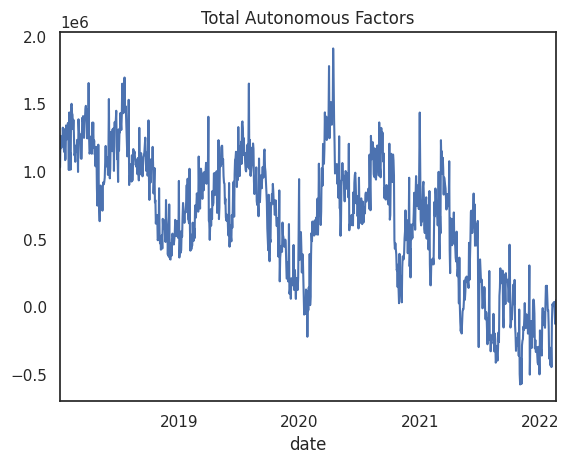

In [9]:
CIC = pd.read_excel('../data/CIC.xlsx', parse_dates=['date'], index_col='date')
NFA = pd.read_excel('../data/NFA.xlsx', parse_dates=['date'], index_col='date')
SAB = pd.read_excel('../data/SAB.xlsx', parse_dates=['date'], index_col='date')
data = pd.concat([CIC, NFA, SAB], axis=1)
data['Total'] = data['NFA'] - data['CIC'] - data['SAB']
data['Total'].plot(title = 'Total Autonomous Factors'); plt.show()

## Section 2: Model Definition

In [10]:
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.statsforecast import (
    StatsForecastAutoARIMA,
    StatsForecastAutoETS,
    StatsForecastAutoCES, 
    StatsForecastAutoTheta,
    StatsForecastAutoTBATS,
)

ForecastingModels = {
    "Naive": NaiveForecaster(strategy = 'trend'),
    "AutoARIMA": StatsForecastAutoARIMA(
                    trend=True, seasonal=True),
    "AutoETS": StatsForecastAutoETS(season_length=1),
    "AutoCES": StatsForecastAutoCES(season_length=1),
    "AutoTheta": StatsForecastAutoTheta(season_length=1),
    "AutoTBATS": StatsForecastAutoTBATS(seasonal_periods=1, use_trend =True, use_boxcox=True),
}
from forecast_combine import model_select as f
model = f.ForecastModelSelect(
            data= data,
            depvar_str = 'Total',                 
            exog_l=None,
            fh = 10,
            pct_initial_window=0.75,
            step_length = 5,
            forecasters_d= ForecastingModels,
            freq = 'B',
            mode = 'best_horizon',
            score = 'RMSE', 
            nbest = 2)

### Cross validation Procedure

Number of Folds      : 53
Initial Window Size  : 808
Step Length          : 5
Forecast Horizon     : 10
First Cutoff         : 2021-02-05 00:00:00
Last Curoff          : 2022-02-04 00:00:00


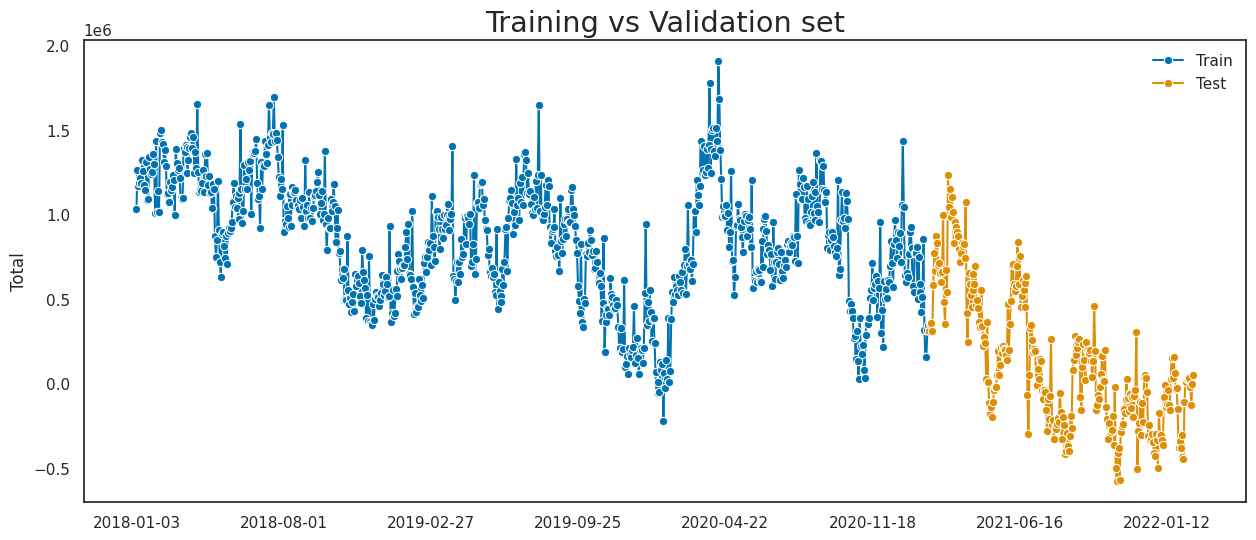

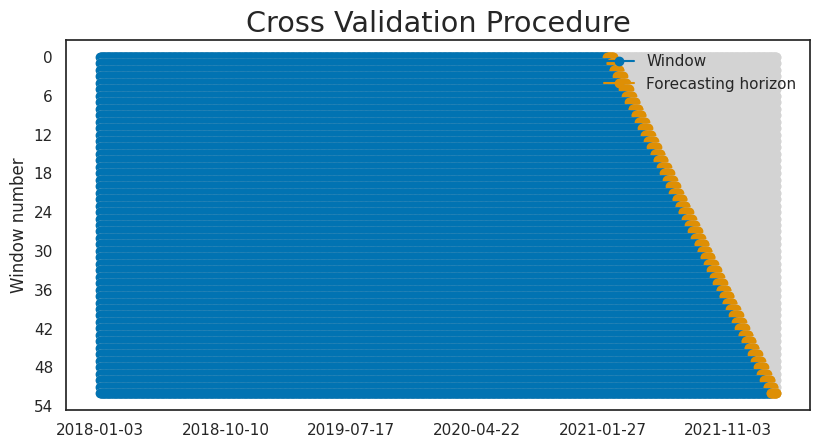

In [11]:
_ = model.split_procedure_summary()

model.plot_train_test(
    labels = ['Train', 'Test'],
    title='Training vs Validation set')
plt.savefig(os.path.join(output_folder, f'train_test_{today}.png'), dpi=300)

model.plot_cv_procedure(xlabel='')
plt.savefig(os.path.join(output_folder, f'cross_validation_{today}.png'), dpi=300)

### Out-Of-sample Evaluation

In [12]:
summary_horizon, summary_results = model.evaluate()


Start Naive forecaster evalution....


/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/joblib/parallel.py:598: FitFailedWarning: 
                In evaluate, fitting of forecaster NaiveForecaster failed,
                you can set error_score='raise' in evaluate to see
                the exception message.
                Fit failed for the 25-th data split, on training data y_train with
                cutoff <NA>, and len(y_train)=933.
                The score will be set to nan.
                Failed forecaster with parameters: NaiveForecaster(strategy='trend').
                
  return [func(*args, **kwargs)
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/joblib/parallel.py:598: FitFailedWarning: 
                In evaluate, fitting of forecaster NaiveForecaster failed,
                you can set error_score='raise' in evaluate to see
                the exception message.
                Fit failed for the 15-th data split, on training data y_train with
    

Evaluation completed in: 0.038 minutes
Error evaluating Naive: cannot concatenate object of type '<class 'pandas._libs.missing.NAType'>'; only Series and DataFrame objs are valid

model Naive cannot be evaluated. It will be removed from the list of models

Start AutoARIMA forecaster evalution....


/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/statsforecast/arima.py:913: UserWarning: possible convergence problem: minimize gave code 2]
  warnings.warn(
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/statsforecast/arima.py:913: UserWarning: possible convergence problem: minimize gave code 2]
  warnings.warn(
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/statsforecast/arima.py:913: UserWarning: possible convergence problem: minimize gave code 2]
  warnings.warn(
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/statsforecast/arima.py:913: UserWarning: possible convergence problem: minimize gave code 2]
  warnings.warn(
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/statsforecast/arima.py:913: UserWarning: possible convergence problem: minimize gave code 2]
  warnings.warn(
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/

Evaluation completed in: 0.225 minutes

Start AutoETS forecaster evalution....


/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:959: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  return x.to_period(freq)
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:901: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  absolute = absolute.to_timestamp(fh.freq)
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:959: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  return x.to_period(freq)
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:901: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future v

Evaluation completed in: 0.328 minutes

Start AutoCES forecaster evalution....


/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:959: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  return x.to_period(freq)
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:901: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  absolute = absolute.to_timestamp(fh.freq)
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:959: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  return x.to_period(freq)
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:901: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future v

Evaluation completed in: 0.363 minutes

Start AutoTheta forecaster evalution....


/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:959: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  return x.to_period(freq)
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:901: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  absolute = absolute.to_timestamp(fh.freq)
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:959: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  return x.to_period(freq)
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/sktime/forecasting/base/_fh.py:901: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future v

Evaluation completed in: 0.322 minutes

Start AutoTBATS forecaster evalution....


/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/statsforecast/utils.py:356: FutureWarning: `seasonal_periods` has been deprecated, please use `season_length` instead.
  warnings.warn(
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/statsforecast/utils.py:356: FutureWarning: `seasonal_periods` has been deprecated, please use `season_length` instead.
  warnings.warn(
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/statsforecast/tbats.py:949: UserWarning: Data contains zero or negative values, disabling Box-Cox transformation.
  warnings.warn(
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/statsforecast/tbats.py:949: UserWarning: Data contains zero or negative values, disabling Box-Cox transformation.
  warnings.warn(
/home/ubuntu/Documents/Projects/forecast/.venv/lib/python3.9/site-packages/statsforecast/utils.py:356: FutureWarning: `seasonal_periods` has been deprecated, please u

Evaluation completed in: 0.206 minutes


In [13]:
display(summary_results.T.sort_values('Avg MAPE'))
display(summary_horizon.T)

,Number of Folds,Avg Fit time (s),Avg_pred_time (s),Smallest training window,Largest training window,First cutoff,Last cutoff,Avg RMSE,Avg MAE,Avg MAPE,Avg R2,Avg MedianAE
AutoCES,53,20.558769,0.25392,808,1068,2021-02-05 00:00:00,2022-02-04 00:00:00,234658.739104,203263.156683,2.355061,-3.559434,192406.607122
AutoTBATS,53,6.931518,0.005023,808,1068,2021-02-05 00:00:00,2022-02-04 00:00:00,233794.637163,203707.694535,2.363337,-3.706809,193449.865376
AutoARIMA,53,11.055151,1.117626,808,1068,2021-02-05 00:00:00,2022-02-04 00:00:00,237768.750925,206300.715286,2.433971,-3.763228,196199.938715
AutoETS,53,18.158935,0.513572,808,1068,2021-02-05 00:00:00,2022-02-04 00:00:00,238147.534496,206652.92483,2.444818,-3.755165,197137.529023
AutoTheta,53,14.145701,0.209843,808,1068,2021-02-05 00:00:00,2022-02-04 00:00:00,238035.794813,206505.295084,2.455977,-3.779269,196332.091898


horizon                        1              2              3   \
AutoARIMA RMSE      192755.843784  224767.608139  208880.382893   
          MAE       147543.109129  157690.596510  162679.186220   
          MAPE           1.835003       1.555559       1.886426   
          R2             0.764590       0.640136       0.728462   
          MedianAE  116127.937138  107859.752219  120651.852708   
AutoETS   RMSE      192912.887254  225050.408011  209082.593209   
          MAE       148066.931047  157118.680662  162310.329281   
          MAPE           1.859074       1.545226       1.898841   
          R2             0.764206       0.639230       0.727936   
          MedianAE  124206.528692  112436.450841  115735.593018   
AutoCES   RMSE      191932.967034  222831.833015  207616.886604   
          MAE       147241.027307  155861.497683  161088.459417   
          MAPE           1.831023       1.523222       1.858657   
          R2             0.766596       0.646308       0.731737   
          MedianAE  123145.140625  112015.093750  117816.414062   
AutoTheta RMSE      192800.723777  224924.685722  208901.885930   
          MAE       148060.214844  157089.666490  162577.911768   
          MAPE           1.859970       1.552390       1.908751   
          R2             0.764481       0.639633       0.728407   
          MedianAE  126209.687500  114332.687500  117364.351562   
AutoTBATS RMSE      194145.453474  226411.968951  212691.200545   
          MAE       148059.574076  155700.285560  159373.753753   
          MAPE           1.884732       1.455162       1.743117   
          R2             0.761184       0.634851       0.718464   
          MedianAE  122314.573285   97719.389489  120922.079261   

horizon                        4              5              6   \
AutoARIMA RMSE      218072.012121  260544.624295  277233.574068   
          MAE       175232.238174  223565.952923  235926.702200   
          MAPE           1.607648       2.151664       3.197770   
          R2             0.676965       0.603142       0.511227   
          MedianAE  150382.530691  217454.537311  236144.483692   
AutoETS   RMSE      218400.189387  261479.265777  278058.888132   
          MAE       174738.457290  224185.687131  236848.864067   
          MAPE           1.606322       2.185837       3.204908   
          R2             0.675992       0.600290       0.508312   
          MedianAE  141042.750702  219918.073566  241302.750702   
AutoCES   RMSE      215596.592454  259030.112284  273592.915019   
          MAE       172694.018030  221170.247890  231458.762133   
          MAPE           1.568807       2.115767       3.088494   
          R2             0.684257       0.607742       0.523980   
          MedianAE  147070.531250  220878.140625  241743.062500   
AutoTheta RMSE      218160.816676  261790.109544  277772.224276   
          MAE       174637.784111  224758.818599  236751.756242   
          MAPE           1.620234       2.189134       3.211580   
          R2             0.676702       0.599339       0.509326   
          MedianAE  140416.140625  218158.296875  239115.437500   
AutoTBATS RMSE      219127.103883  257176.009162  277701.558088   
          MAE       175120.138456  210769.873193  231876.167053   
          MAPE           1.421775       2.124262       3.206228   
          R2             0.673832       0.613338       0.509575   
          MedianAE  142832.364239  187952.051141  229934.173427   

horizon                        7              8              9              10  
AutoARIMA RMSE      288153.863755  279801.121672  286278.597485  303051.693229  
          MAE       239706.223097  241808.593788  235341.798728  243512.752090  
          MAPE           2.417311       2.337787       4.562286       2.788261  
          R2             0.405382       0.513062       0.441512       0.452388  
          MedianAE  211457.038371  224575.502940  203497.386873  204582.053249  
AutoETS   RMSE      288922.2

In [14]:
rank, score = model.select_best(score = 'MAPE')
display(rank)
display(score)

horizon,1,2,3,4,5,6,7,8,9,10
Best_1,AutoCES,AutoTBATS,AutoTBATS,AutoTBATS,AutoCES,AutoCES,AutoTBATS,AutoCES,AutoCES,AutoCES
Best_2,AutoARIMA,AutoCES,AutoCES,AutoCES,AutoTBATS,AutoARIMA,AutoCES,AutoARIMA,AutoTBATS,AutoARIMA
Best_3,AutoETS,AutoETS,AutoARIMA,AutoETS,AutoARIMA,AutoETS,AutoETS,AutoETS,AutoETS,AutoTheta
Best_4,AutoTheta,AutoTheta,AutoETS,AutoARIMA,AutoETS,AutoTBATS,AutoARIMA,AutoTheta,AutoARIMA,AutoETS
Best_5,AutoTBATS,AutoARIMA,AutoTheta,AutoTheta,AutoTheta,AutoTheta,AutoTheta,AutoTBATS,AutoTheta,AutoTBATS


,AutoARIMA,AutoETS,AutoCES,AutoTheta,AutoTBATS,Best Model (over all),Best Model (per horizon),Best 2 Models (over all),Best 2 Models (per horizon),Model Avg (all models)
horizon,,,,,,,,,,
1,1.835003,1.859074,1.831023,1.859970,1.884732,1.831023,1.831023,1.857878,1.833013,1.853961
2,1.555559,1.545226,1.523222,1.552390,1.455162,1.523222,1.455162,1.489192,1.489192,1.526312
3,1.886426,1.898841,1.858657,1.908751,1.743117,1.858657,1.743117,1.800887,1.800887,1.859158
4,1.607648,1.606322,1.568807,1.620234,1.421775,1.568807,1.421775,1.495291,1.495291,1.564957
5,2.151664,2.185837,2.115767,2.189134,2.124262,2.115767,2.115767,2.120015,2.120015,2.153333
6,3.197770,3.204908,3.088494,3.211580,3.206228,3.088494,3.088494,3.147361,3.143132,3.181796
7,2.417311,2.414258,2.318235,2.440257,2.180343,2.318235,2.180343,2.249289,2.249289,2.354081
8,2.337787,2.353525,2.252187,2.363110,2.430766,2.252187,2.252187,2.341476,2.294987,2.347475
9,4.562286,4.546683,4.305428,4.595571,4.331860,4.305428,4.305428,4.318644,4.318644,4.468366


In [15]:
# export all the result in excel 
with pd.ExcelWriter(os.path.join(output_folder, f'Cross_validation_result_{today}.xlsx')) as writer:
    summary_results.to_excel(writer, sheet_name='summary_results', index=True)
    summary_horizon.to_excel(writer, sheet_name='summary_horizon', index=True)
    rank.to_excel(writer, sheet_name='rank', index=True)
    score.to_excel(writer, sheet_name='score', index=True)

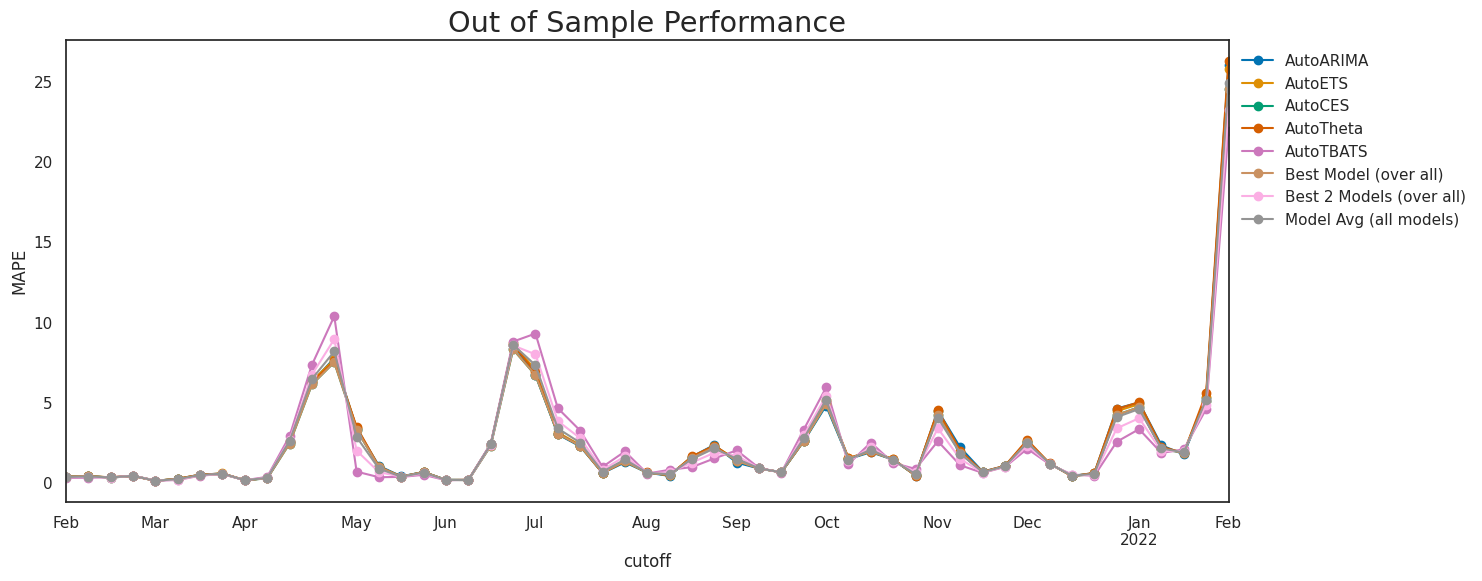

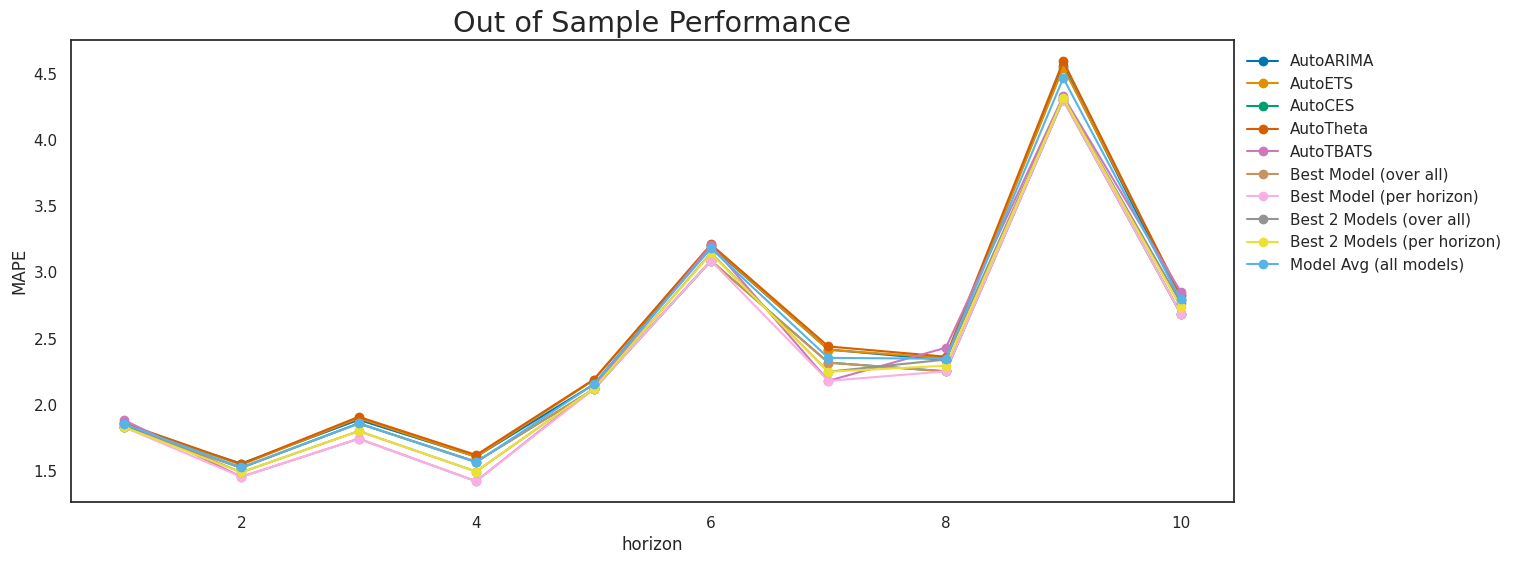

In [17]:
subset = ['AutoETS', 'AutoCES', 'AutoTBATS', 'Prophet','Model Avg (all models)']
model.plot_model_compare(score ='MAPE', view = 'cutoff')#, model_subset=subset)
plt.savefig(os.path.join(output_folder, f'model_compare_per_cutoff_{today}.png'), dpi=300, bbox_inches='tight')
model.plot_model_compare(score ='MAPE', view = 'horizon')#, model_subset=subset + ['Best Model (per horizon)'])
plt.savefig(os.path.join(output_folder, f'model_compare_per_horizon_{today}.png'), dpi=300, bbox_inches='tight')

In [ ]:
model.fit(verbose = True)

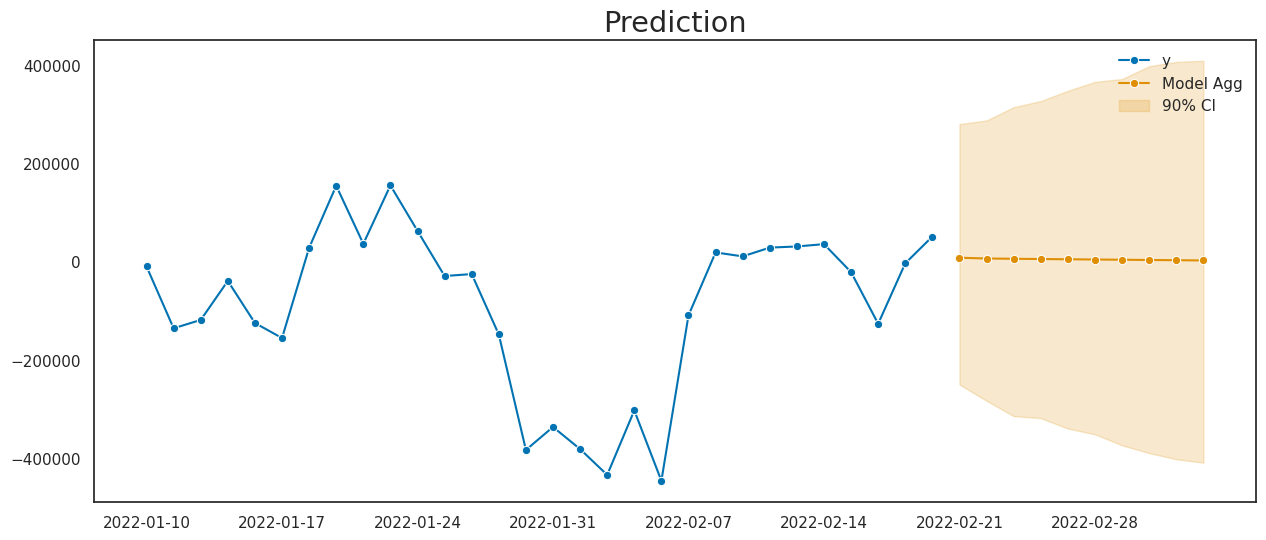

In [21]:
y_pred, y_pred_ints, preds, pred_ints = model.predict(mode='average', ret_underlying=True)
f, ax =model.plot_prediction(y_pred = y_pred,
                     models_preds = None,
                     y_pred_interval = y_pred_ints)  

In [19]:
path = '../model_output/Total_AF_forecast.pkl'
model.save(path)